< [Traitement de données](02-traitement-donnees.ipynb) | [Contents](index.ipynb) | [Analyse statistique](04-statistiques.ipynb) >

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import mplleaflet as mpll

In [39]:
accidents = gpd.read_file("donnees/accidents-geobase/accidents0.shp")
accidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 69 columns):
NO_SEQ_COL    1119 non-null object
JR_SEMN_AC    1119 non-null object
DT_ACCDN      1119 non-null object
CD_MUNCP      1119 non-null int64
NO_CIVIQ_A    557 non-null float64
SFX_NO_CIV    1 non-null object
BORNE_KM_A    1 non-null float64
RUE_ACCDN     1082 non-null object
TP_REPRR_A    651 non-null float64
ACCDN_PRES    687 non-null object
NB_METRE_D    234 non-null float64
CD_GENRE_A    1071 non-null float64
CD_SIT_PRT    30 non-null float64
CD_ETAT_SU    1017 non-null float64
CD_ECLRM      1026 non-null float64
CD_ENVRN_A    1078 non-null float64
NO_ROUTE      2 non-null float64
CD_CATEG_R    1085 non-null float64
CD_ETAT_CH    304 non-null float64
CD_ASPCT_R    1026 non-null float64
CD_LOCLN_A    985 non-null float64
CD_POSI_AC    278 non-null float64
CD_CONFG_R    968 non-null float64
CD_ZON_TRA    15 non-null float64
CD_PNT_CDR    0 non-null object
CD_PNT_C_1    347 

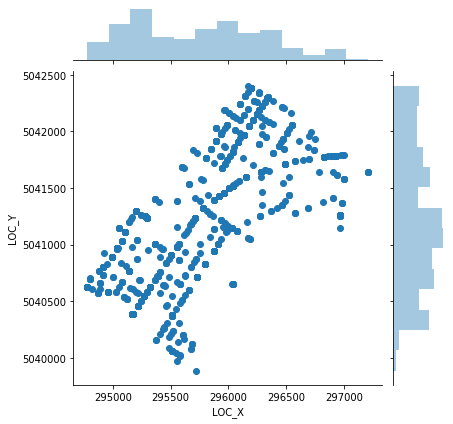

In [9]:
sns.jointplot(x="LOC_X", y="LOC_Y", data=accidents)

In [38]:
#accidents#
fig, ax = plt.subplots(1, figsize=(6, 6))
wgsAccidents = accidents.to_crs(epsg = 4326)
wgsAccidents.plot(ax=ax)
mpll.display(fig=fig)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Mesures de centralité

In [54]:
from pointpats import PointPattern
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
pp = PointPattern(accidents[['LOC_X','LOC_Y']])
pp.summary()

Point Pattern
1119 points
Bounding rectangle [(294776.752,5039886.797), (297210.23699,5042404.5771)]
Area of window: 6126980.081470966
Intensity estimate for window: 0.00018263483561568072
              x             y
0  296318.68801  5.042102e+06
1  295578.35600  5.040651e+06
2  296475.19004  5.041543e+06
3  295966.12500  5.042184e+06
4  296284.20550  5.042131e+06


[ 295725.85722091 5041222.72749821]


(294655.0777505, 297331.9112395, 5039760.9079950005, 5042530.466105)

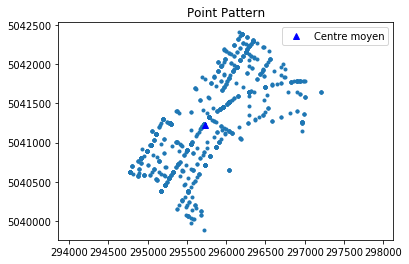

In [51]:
mc = mean_center(pp.points)
print(mc)
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen')
plt.legend(numpoints=1)
plt.axis('equal')

[ 295741.66078455 5041272.35410649]


(294655.0777505, 297331.9112395, 5039760.9079950005, 5042530.466105)

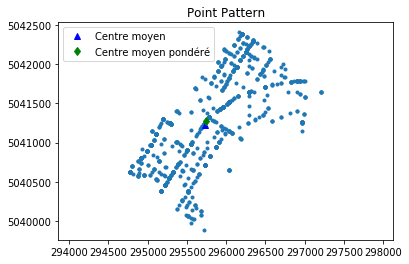

In [53]:
wmc = weighted_mean_center(pp.points, accidents.NB_MORTS+accidents.NB_BLESS_1)
print(wmc)
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen') 
plt.plot(wmc[0], wmc[1], 'gd', label='Centre moyen pondéré')
plt.legend(numpoints=1)
plt.axis('equal')